In [39]:
import FinanceDataReader as fdr
import pandas as pd
import koreanize_matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
import warnings
warnings.filterwarnings('ignore')

## 2. 데이터 수집

### 대한항공

**주가**

In [15]:
k_air = fdr.DataReader('003490', '2023-10-31', '2024-10-31')  
k_air

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-10-31,20050,20550,20050,20500,1150941,0.030151
2023-11-01,20350,20450,19940,20200,607370,-0.014634
2023-11-02,20350,20550,20100,20150,609243,-0.002475
2023-11-03,20350,20500,20150,20450,569772,0.014888
2023-11-06,20750,21150,20500,21150,1220631,0.034230
...,...,...,...,...,...,...
2024-10-25,23450,23700,23250,23300,660587,-0.006397
2024-10-28,23300,23800,23300,23700,1007333,0.017167
2024-10-29,23800,24200,23750,24150,1746370,0.018987


#### 손익계산서
매출액, 영업이익, 세전계속사업이익, 당기순이익

In [16]:
k_s = pd.read_excel("손익계산서.xlsx")
k_s

,Date,매출액,영업이익,세전게속사업이익,당기순이익
0,2023/06,38773,4772,4886,3600
1,2023/09,42490,5430,5770,4198
2,2023/12,43934,2843,1452,982
3,2024/03,42914,5375,5472,4065
4,2024/06,44022,4429,4841,3591
5,2024/09,46888,6110,5931,4177
6,2024/12,46620,4985,4274,3176
7,2025/03,50920,5850,6540,4640


#### 재무상태표
자산총계, 부채총계, 자본총계

In [17]:
k_j = pd.read_excel("재무상태표.xlsx")
k_j

,Date,자산총계,부채총계,자본총계
0,2023/06,295690.0,199725.0,95965.0
1,2023/09,299548.0,199261.0,100288.0
2,2023/12,303918.0,205766.0,98152.0
3,2024/03,312747.0,213069.0,99678.0
4,2024/06,314832.0,211419.0,103413.0
5,2024/09,321296.0,211536.0,109760.0
6,2024/12,NaN,NaN,NaN
7,2025/03,NaN,NaN,NaN


#### 현금흐름표
영업활동현금흐름, 투자활동현금흐름, 재무활동현금흐름

In [18]:
k_h = pd.read_excel("현금흐름표.xlsx")
k_h

,Date,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름
0,2023/06,10463.0,-7580.0,-5562.0
1,2023/09,9623.0,-5699.0,-6479.0
2,2023/12,9308.0,-4820.0,-3422.0
3,2024/03,9829.0,-7824.0,-2413.0
4,2024/06,10819.0,-2856.0,-7804.0
5,2024/09,NaN,NaN,NaN
6,2024/12,NaN,NaN,NaN
7,2025/03,NaN,NaN,NaN


### 아시아나

**주가**

In [19]:
a_air = fdr.DataReader('020560', '2023-10-31', '2024-10-31')
a_air

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-10-31,10190,12130,10150,11150,10076283,0.080426
2023-11-01,11050,11450,10600,11180,1321065,0.002691
2023-11-02,11200,11950,10100,10210,3139155,-0.086762
2023-11-03,10210,10310,9960,10120,487539,-0.008815
2023-11-06,10160,10400,10100,10400,504601,0.027668
...,...,...,...,...,...,...
2024-10-25,9760,9790,9620,9620,47984,-0.009269
2024-10-28,9630,9960,9200,9940,121063,0.033264
2024-10-29,9960,10100,9940,10090,162154,0.015091


#### 손익계산서
매출액, 영업이익, 세전계속사업이익, 당기순이익

In [20]:
a_s = pd.read_excel("손익계산서2.xlsx")
a_s

,Date,매출액,영업이익,세전게속사업이익,당기순이익
0,2023/06,18256.0,1513.0,175.0,88.0
1,2023/09,20019.0,1995.0,-23.0,-36.0
2,2023/12,20485.0,1023.0,1934.0,2297.0
3,2024/03,20089.0,623.0,-1984.0,-1529.0
4,2024/06,20153.0,180.0,-1693.0,-1221.0
5,2024/09,NaN,NaN,NaN,NaN
6,2024/12,NaN,NaN,NaN,NaN
7,2025/03,NaN,NaN,NaN,NaN


#### 재무상태표
자산총계, 부채총계, 자본총계

In [21]:
a_j = pd.read_excel("재무상태표2.xlsx")
a_j

,Date,자산총계,부채총계,자본총계
0,2023/06,136965.0,130732.0,6233.0
1,2023/09,132534.0,126568.0,5966.0
2,2023/12,130167.0,122064.0,8103.0
3,2024/03,134104.0,127739.0,6365.0
4,2024/06,134815.0,129868.0,4946.0
5,2024/09,NaN,NaN,NaN
6,2024/12,NaN,NaN,NaN
7,2025/03,NaN,NaN,NaN


#### 현금흐름표
영업활동현금흐름, 투자활동현금흐름, 재무활동현금흐름

In [22]:
a_h = pd.read_excel("현금흐름표2.xlsx")
a_h

,Date,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름
0,2023/06,5686.0,-1078.0,-2208.0
1,2023/09,3619.0,-1291.0,-9692.0
2,2023/12,2046.0,2152.0,-4283.0
3,2024/03,3950.0,-317.0,845.0
4,2024/06,2976.0,-1331.0,-2176.0
5,2024/09,NaN,NaN,NaN
6,2024/12,NaN,NaN,NaN
7,2025/03,NaN,NaN,NaN


### 시장 지표

In [23]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [24]:
k = fdr.DataReader('KS11', '2023-10-31', '2024-10-31') 
k

1 001 2023-10-31 00:00:00 2025-10-30 00:00:00


,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2023-10-31,2318.39,2322.45,2273.97,2277.99,394982283,-0.0141,2,-32.56,8233073267951,1815424104493218
2023-11-01,2292.89,2312.15,2288.64,2301.56,358157301,0.0103,1,23.57,6739277694118,1835317635644088
2023-11-02,2334.96,2351.91,2333.41,2343.12,377461502,0.0181,1,41.56,7679304707201,1868116867300456
2023-11-03,2365.59,2370.28,2351.83,2368.34,578661884,0.0108,1,25.22,8040958355185,1887967827119667
2023-11-06,2399.80,2502.37,2395.03,2502.37,528584832,0.0566,1,134.03,15225479879466,1991919718242366
...,...,...,...,...,...,...,...,...,...,...
2024-10-25,2597.44,2611.27,2577.00,2583.27,462898403,0.0009,1,2.24,10286877485946,2105651493083676
2024-10-28,2588.45,2612.96,2587.20,2612.43,333735957,0.0113,1,29.16,9133006346665,2129841276048609
2024-10-29,2606.94,2617.80,2595.86,2617.80,363290058,0.0021,1,5.37,9341171256858,2134424479869187


In [25]:
import yfinance as yf

n = yf.download('^IXIC', start='2023-10-31', end='2025-10-30')
n

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^IXIC,^IXIC,^IXIC,^IXIC,^IXIC,^IXIC
Date,,,,,,
2023-10-31 00:00:00+00:00,12851.240234,12851.240234,12859.400391,12697.040039,12786.620117,4315630000
2023-11-01 00:00:00+00:00,13061.469727,13061.469727,13072.419922,12875.200195,12887.059570,4545120000
2023-11-02 00:00:00+00:00,13294.190430,13294.190430,13302.179688,13177.639648,13230.490234,4962950000
2023-11-03 00:00:00+00:00,13478.280273,13478.280273,13520.280273,13344.730469,13362.849609,4918750000
2023-11-06 00:00:00+00:00,13518.780273,13518.780273,13551.620117,13435.990234,13514.080078,4345850000
...,...,...,...,...,...,...
2024-10-25 00:00:00+00:00,18518.609375,18518.609375,18690.009766,18487.060547,18512.580078,6100040000
2024-10-28 00:00:00+00:00,18567.189453,18567.189453,18671.009766,18563.019531,18648.250000,5641660000


### 재무비율

**대한항공**

In [26]:
k_r = pd.read_excel("재무비율.xlsx")
k_r

,Date,유동비율,부채비율,ROE,ROA
0,2023/06,208.12,2.11,15.76,4.66
1,2023/09,198.69,2.12,15.22,4.75
2,2023/12,209.64,2.13,11.46,3.80
3,2024/03,213.76,2.15,12.94,4.23
4,2024/06,204.44,2.14,12.24,4.21
5,2024/09,192.73,NaN,NaN,NaN
6,2024/12,NaN,NaN,NaN,NaN
7,2025/03,NaN,NaN,NaN,NaN


**아시아나**

In [27]:
a_r = pd.read_excel("재무비율2.xlsx")
a_r

,Date,유동비율,부채비율,ROE,ROA
0,2023/06,52.33,2.10,51.29,1.76
1,2023/09,30.48,2.12,137.97,3.92
2,2023/12,79.18,1.51,16.61,1.36
3,2024/03,29.27,2.01,2.12,0.61
4,2024/06,-6.43,2.03,-21.67,-0.36
5,2024/09,NaN,NaN,NaN,NaN
6,2024/12,NaN,NaN,NaN,NaN
7,2025/03,NaN,NaN,NaN,NaN


## 3. 재무분석

### 데이터통합

In [45]:
combined_financials = pd.DataFrame({
    "Date": k_s["Date"],
    
    "대한항공_매출액": k_s["매출액"],
    "대한항공_영업이익": k_s["영업이익"],
    "대한항공_당기순이익": k_s["당기순이익"],
    "대한항공_자산총계": k_j["자산총계"],
    "대한항공_부채총계": k_j["부채총계"],
    "대한항공_자본총계": k_j["자본총계"],
    "대한항공_영업활동현금흐름": k_h["영업활동현금흐름"],
    "대한항공_투자활동현금흐름": k_h["투자활동현금흐름"],
    "대한항공_재무활동현금흐름": k_h["재무활동현금흐름"],
    
    "아시아나_매출액": a_s["매출액"],
    "아시아나_영업이익": a_s["영업이익"],
    "아시아나_당기순이익": a_s["당기순이익"],
    "아시아나_자산총계": a_j["자산총계"],
    "아시아나_부채총계": a_j["부채총계"],
    "아시아나_자본총계": a_j["자본총계"],
    "아시아나_영업활동현금흐름": a_h["영업활동현금흐름"],
    "아시아나_투자활동현금흐름": a_h["투자활동현금흐름"],
    "아시아나_재무활동현금흐름": a_h["재무활동현금흐름"]
})

In [46]:
combined_financials["대한항공_영업이익률"] = (combined_financials["대한항공_영업이익"] / combined_financials["대한항공_매출액"]) * 100
combined_financials["대한항공_순이익률"] = (combined_financials["대한항공_당기순이익"] / combined_financials["대한항공_매출액"]) * 100
combined_financials["대한항공_매출성장률"] = combined_financials["대한항공_매출액"].pct_change(fill_method=None) * 100

combined_financials["아시아나_영업이익률"] = (combined_financials["아시아나_영업이익"] / combined_financials["아시아나_매출액"]) * 100
combined_financials["아시아나_순이익률"] = (combined_financials["아시아나_당기순이익"] / combined_financials["아시아나_매출액"]) * 100
combined_financials["아시아나_매출성장률"] = combined_financials["아시아나_매출액"].pct_change(fill_method=None) * 100

In [47]:
combined_financials["대한항공_유동비율"] = k_r["유동비율"]
combined_financials["대한항공_부채비율"] = k_r["부채비율"]

combined_financials["아시아나_유동비율"] = a_r["유동비율"]
combined_financials["아시아나_부채비율"] = a_r["부채비율"]

from IPython.display import display
display(combined_financials)

### 재무지표

In [18]:
comparison_df = combined_financials[[
    "Date",
    "대한항공_영업이익률", "대한항공_순이익률", "대한항공_매출성장률",  
    "대한항공_유동비율", "대한항공_부채비율",                       
    "아시아나_영업이익률", "아시아나_순이익률", "아시아나_매출성장률", 
    "아시아나_유동비율", "아시아나_부채비율"                         
]]

print("수익성 분석")
print(comparison_df[["Date", "대한항공_영업이익률", "대한항공_순이익률", 
                     "아시아나_영업이익률", "아시아나_순이익률"]])

print("\n안정성 분석")
print(comparison_df[["Date", "대한항공_유동비율", "대한항공_부채비율", 
                     "아시아나_유동비율", "아시아나_부채비율"]])

print("\n성장성 분석")
print(comparison_df[["Date", "대한항공_매출성장률", "아시아나_매출성장률"]])

print("\n평균 수익성 지표")
print(comparison_df[["대한항공_영업이익률", "대한항공_순이익률", 
                     "아시아나_영업이익률", "아시아나_순이익률"]].mean())

print("\n평균 안정성 지표")
print(comparison_df[["대한항공_유동비율", "대한항공_부채비율", 
                     "아시아나_유동비율", "아시아나_부채비율"]].mean())

print("\n평균 성장성 지표")
print(comparison_df[["대한항공_매출성장률", "아시아나_매출성장률"]].mean())

수익성 분석
      Date  대한항공_영업이익률  대한항공_순이익률  아시아나_영업이익률  아시아나_순이익률
0  2023/06   12.307534   9.284812    8.287686   0.482033
1  2023/09   12.779478   9.879972    9.965533  -0.179829
2  2023/12    6.471070   2.235171    4.993898  11.213083
3  2024/03   12.525050   9.472433    3.101200  -7.611130
4  2024/06   10.060879   8.157285    0.893167  -6.058651
5  2024/09   13.031053   8.908463         NaN        NaN
6  2024/12   10.692836   6.812527         NaN        NaN
7  2025/03   11.488610   9.112333         NaN        NaN

안정성 분석
      Date  대한항공_유동비율  대한항공_부채비율  아시아나_유동비율  아시아나_부채비율
0  2023/06     208.12       2.11      52.33       2.10
1  2023/09     198.69       2.12      30.48       2.12
2  2023/12     209.64       2.13      79.18       1.51
3  2024/03     213.76       2.15      29.27       2.01
4  2024/06     204.44       2.14      -6.43       2.03
5  2024/09     192.73        NaN        NaN        NaN
6  2024/12        NaN        NaN        NaN        NaN
7  2025/03        NaN        NaN

## 4. 주가분석

In [40]:
k_air["MA20"] = k_air["Close"].rolling(window=20).mean()  
k_air["MA50"] = k_air["Close"].rolling(window=50).mean()  

delta = k_air["Close"].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
k_air["RSI"] = 100 - (100 / (1 + rs))

k_air["EMA12"] = k_air["Close"].ewm(span=12, adjust=False).mean()
k_air["EMA26"] = k_air["Close"].ewm(span=26, adjust=False).mean()
k_air["MACD"] = k_air["EMA12"] - price_data["EMA26"]
k_air["MACD_signal"] = k_air["MACD"].ewm(span=9, adjust=False).mean()
k_air["MACD_hist"] = k_air["MACD"] - k_air["MACD_signal"]

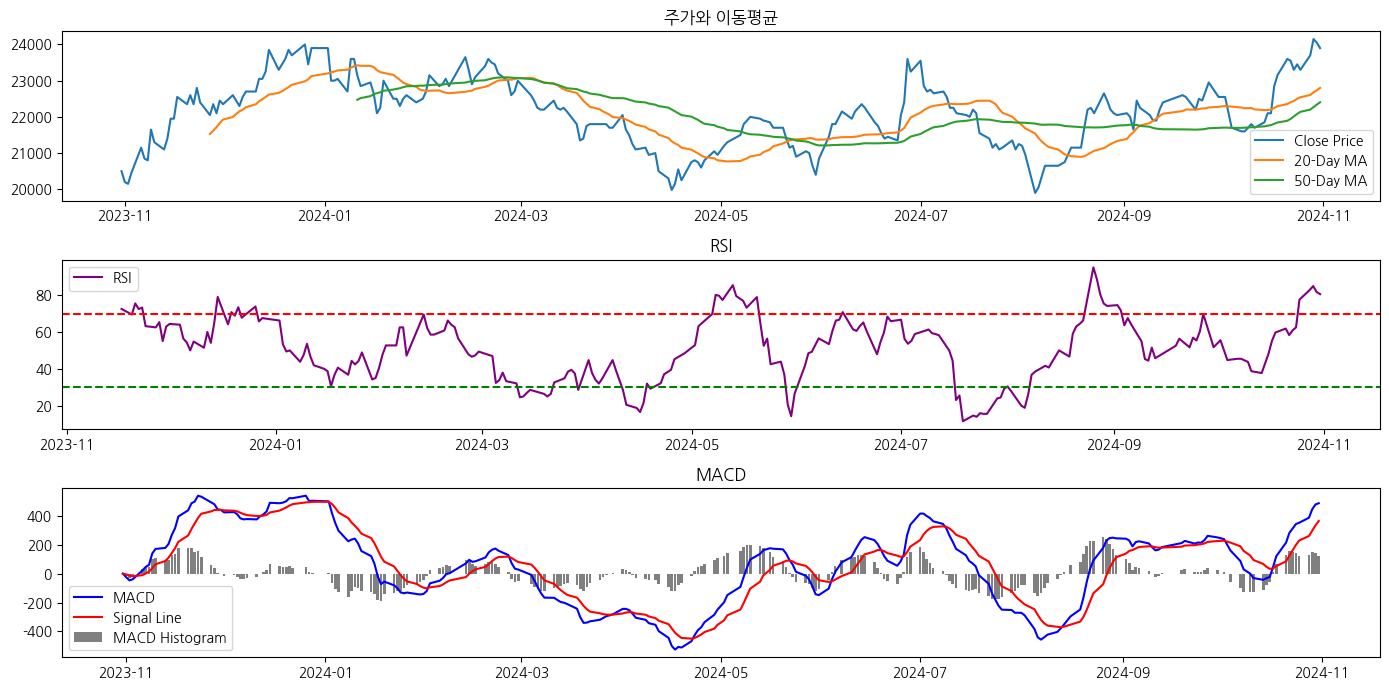

In [41]:
plt.figure(figsize=(14, 7))
plt.subplot(3, 1, 1)
plt.plot(price_data.index, k_air["Close"], label="Close Price")
plt.plot(price_data.index, k_air["MA20"], label="20-Day MA")
plt.plot(price_data.index, k_air["MA50"], label="50-Day MA")
plt.legend()
plt.title("주가와 이동평균")

plt.subplot(3, 1, 2)
plt.plot(price_data.index, k_air["RSI"], label="RSI", color='purple')
plt.axhline(70, color='red', linestyle='--')  
plt.axhline(30, color='green', linestyle='--')  
plt.legend()
plt.title("RSI")

plt.subplot(3, 1, 3)
plt.plot(price_data.index, k_air["MACD"], label="MACD", color='blue')
plt.plot(price_data.index, k_air["MACD_signal"], label="Signal Line", color='red')
plt.bar(price_data.index, k_air["MACD_hist"], color='gray', label="MACD Histogram")
plt.legend()
plt.title("MACD")

plt.tight_layout()
plt.show()

## 5. 회귀분석 & 상관분석

In [42]:
k_air['close-1'] = k_air['Close'].shift(1)
k_air['close-2'] = k_air['Close'].shift(2)  
k_air.dropna(inplace=True)  

X = k_air[['close-1', 'close-2']]
y = k_air['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 177705.47882911644
R-squared: 0.8192485772738499


## 6. 경쟁사 비교 분석

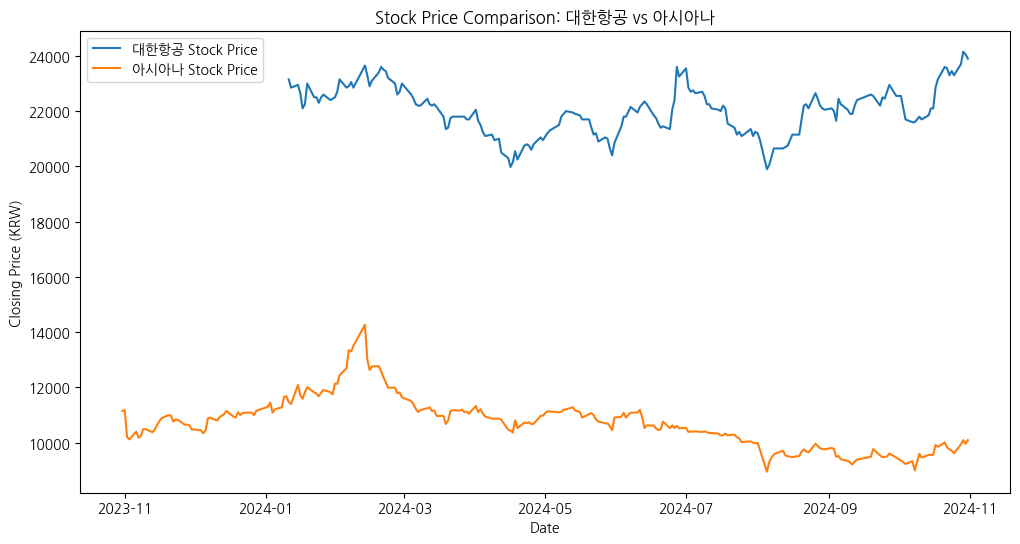

대한항공 Financial Metrics: {'Operating Profit Margin': 0.11169563513559046, 'Net Profit Margin': 0.07982874391013131, 'Revenue Growth Rate': 0.04058224847609927}
아시아나 Financial Metrics: {'Operating Profit Margin': 0.05448296778009763, 'Net Profit Margin': -0.004308989803077273, 'Revenue Growth Rate': 0.014814783070074777}


In [43]:
k_air_metrics = {
    'Operating Profit Margin': (k_s['영업이익'] / k_s['매출액']).mean(),
    'Net Profit Margin': (k_s['당기순이익'] / k_s['매출액']).mean(),
    'Revenue Growth Rate': k_s['매출액'].pct_change().mean()
}
a_air_metrics = {
    'Operating Profit Margin': (a_s['영업이익'] / a_s['매출액']).mean(),
    'Net Profit Margin': (a_s['당기순이익'] / a_s['매출액']).mean(),
    'Revenue Growth Rate': a_s['매출액'].pct_change().mean()
}

plt.figure(figsize=(12, 6))
plt.plot(k_air['Close'], label="대한항공 Stock Price")
plt.plot(a_air['Close'], label="아시아나 Stock Price")
plt.title("Stock Price Comparison: 대한항공 vs 아시아나")
plt.xlabel("Date")
plt.ylabel("Closing Price (KRW)")
plt.legend()
plt.show()

print("대한항공 Financial Metrics:", k_air_metrics)
print("아시아나 Financial Metrics:", a_air_metrics)